Epoch 1000: D Loss = 1.4451, G Loss = 0.6655
Epoch 2000: D Loss = 1.3796, G Loss = 0.7014
Epoch 3000: D Loss = 1.3874, G Loss = 0.6913


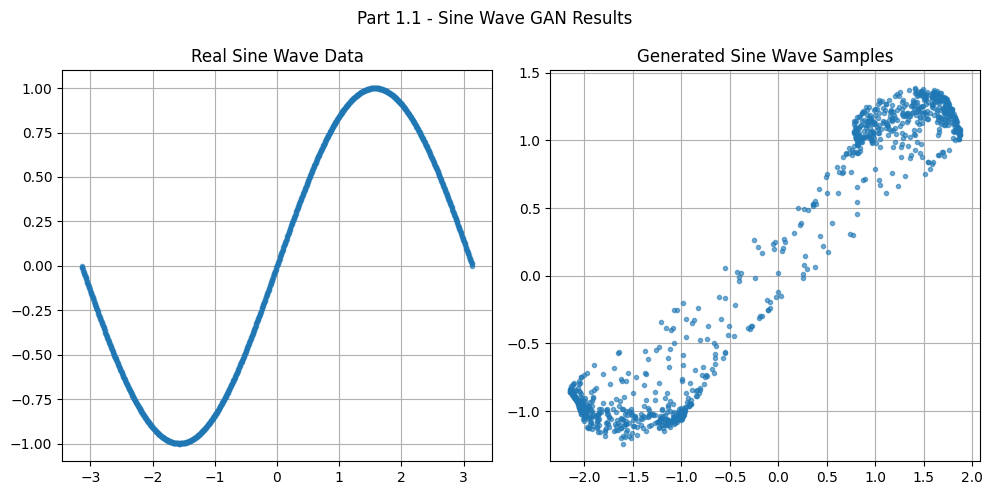

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Part 1.1: Sine Wave Data Generator
def generate_sine_wave(n=1000):
    x = np.linspace(-3.14, 3.14, n)
    y = np.sin(x)
    data = np.stack([x, y], axis=1)
    return data

# Generator
class Generator(nn.Module):
    def __init__(self, latent_dim=2, hidden_dim=128):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 2)
        )
    def forward(self, z):
        return self.model(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, hidden_dim=128):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# GAN Training Function
def train_gan(real_data, latent_dim=2, epochs=3000, batch_size=128):
    real_data = torch.tensor(real_data, dtype=torch.float32)
    loader = DataLoader(TensorDataset(real_data), batch_size=batch_size, shuffle=True)

    G = Generator(latent_dim).to(device)
    D = Discriminator().to(device)

    criterion = nn.BCELoss()
    opt_G = optim.Adam(G.parameters(), lr=0.0002)
    opt_D = optim.Adam(D.parameters(), lr=0.0002)

    for epoch in range(epochs):
        for real_batch, in loader:
            real_batch = real_batch.to(device)
            b_size = real_batch.size(0)
            real_labels = torch.ones((b_size, 1), device=device)
            fake_labels = torch.zeros((b_size, 1), device=device)

            # Train Discriminator
            z = torch.randn(b_size, latent_dim, device=device)
            fake = G(z)
            loss_D = criterion(D(real_batch), real_labels) + criterion(D(fake.detach()), fake_labels)
            opt_D.zero_grad(); loss_D.backward(); opt_D.step()

            # Train Generator
            z = torch.randn(b_size, latent_dim, device=device)
            fake = G(z)
            loss_G = criterion(D(fake), real_labels)
            opt_G.zero_grad(); loss_G.backward(); opt_G.step()

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch {epoch+1}: D Loss = {loss_D.item():.4f}, G Loss = {loss_G.item():.4f}")

    return G

# Plot Results
def plot_results(real_data, generator, latent_dim=2):
    z = torch.randn(1000, latent_dim, device=device)
    generated = generator(z).cpu().detach().numpy()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(real_data[:, 0], real_data[:, 1], '.', alpha=0.6)
    plt.title("Real Sine Wave Data")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(generated[:, 0], generated[:, 1], '.', alpha=0.6)
    plt.title("Generated Sine Wave Samples")
    plt.grid(True)

    plt.suptitle("Part 1.1 - Sine Wave GAN Results")
    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == '__main__':
    sine_data = generate_sine_wave()
    G = train_gan(sine_data)
    plot_results(sine_data, G)


Epoch 1000, D Loss: 1.3194, G Loss: 0.7499
Epoch 2000, D Loss: 1.4072, G Loss: 0.7392
Epoch 3000, D Loss: 1.4118, G Loss: 0.7142
Epoch 4000, D Loss: 1.3862, G Loss: 0.6980
Epoch 5000, D Loss: 1.3838, G Loss: 0.6994


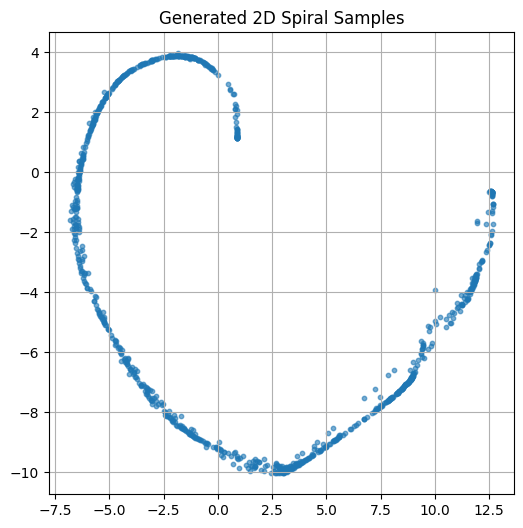

In [11]:
# GAN for 2D Spiral Data in PyTorch


np.random.seed(42)
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate 2D Spiral Data
def generate_spiral(n=1000):
    theta = np.sqrt(np.random.rand(n)) * 2 * np.pi
    r = 2 * theta
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.stack([x, y], axis=1)

# Generator with Tanh activations and deeper architecture
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_dim=128):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 2)
        )

    def forward(self, z):
        return self.model(z)

# Discriminator with ELU activations and deeper layers
class Discriminator(nn.Module):
    def __init__(self, hidden_dim=128):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Training loop
def train_gan(real_data, latent_dim=2, epochs=5000, batch_size=128):
    real_data = torch.tensor(real_data, dtype=torch.float32)
    dataloader = DataLoader(TensorDataset(real_data), batch_size=batch_size, shuffle=True)

    G = Generator(latent_dim).to(device)
    D = Discriminator().to(device)

    criterion = nn.BCELoss()
    optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
    optimizer_D = optim.Adam(D.parameters(), lr=0.0002)

    for epoch in range(epochs):
        for real_batch, in dataloader:
            real_batch = real_batch.to(device)
            b_size = real_batch.size(0)

            real_labels = torch.ones((b_size, 1), device=device)
            fake_labels = torch.zeros((b_size, 1), device=device)

            # Discriminator training
            optimizer_D.zero_grad()
            z = torch.randn(b_size, latent_dim, device=device)
            fake_data = G(z)
            d_loss = criterion(D(real_batch), real_labels) + criterion(D(fake_data.detach()), fake_labels)
            d_loss.backward()
            optimizer_D.step()

            # Generator training
            optimizer_G.zero_grad()
            z = torch.randn(b_size, latent_dim, device=device)
            fake_data = G(z)
            g_loss = criterion(D(fake_data), real_labels)
            g_loss.backward()
            optimizer_G.step()

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch {epoch+1}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    return G

# Plot generated samples
def plot_generated(G, latent_dim):
    z = torch.randn(1000, latent_dim, device=device)
    samples = G(z).cpu().detach().numpy()
    plt.figure(figsize=(6,6))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6, s=10)
    plt.title("Generated 2D Spiral Samples")
    plt.grid(True)
    plt.show()

# Run GAN on spiral data
if __name__ == '__main__':
    data = generate_spiral()
    G = train_gan(data)
    plot_generated(G, latent_dim=2)


Epoch 1000: D Loss = 1.2797, G Loss = 0.7147
Epoch 2000: D Loss = 1.3148, G Loss = 0.7325
Epoch 3000: D Loss = 1.3301, G Loss = 0.7835
Epoch 1000: D Loss = 1.3763, G Loss = 0.7180
Epoch 2000: D Loss = 1.3723, G Loss = 0.7052
Epoch 3000: D Loss = 1.3924, G Loss = 0.7037


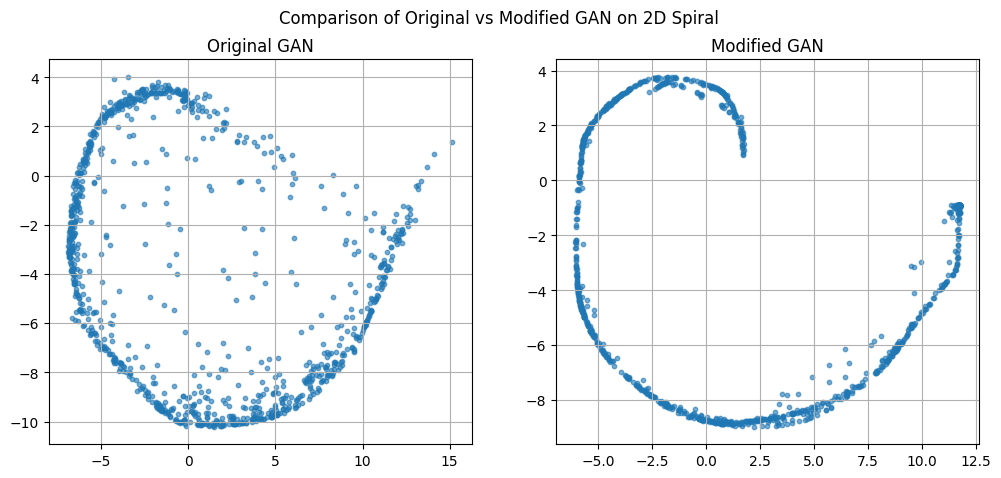

In [13]:
# Compare Original and Modified GAN Architectures on 2D Spiral

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

np.random.seed(42)
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def generate_spiral(n=1000):
    theta = np.sqrt(np.random.rand(n)) * 2 * np.pi
    r = 2 * theta
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.stack([x, y], axis=1)

# Baseline Generator (ReLU, 2 layers)
class GeneratorOriginal(nn.Module):
    def __init__(self, latent_dim, hidden_dim=64):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 2)
        )
    def forward(self, z):
        return self.model(z)

# Baseline Discriminator (ReLU, 2 layers)
class DiscriminatorOriginal(nn.Module):
    def __init__(self, hidden_dim=64):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# Modified Generator (Tanh, 4 layers)
class GeneratorModified(nn.Module):
    def __init__(self, latent_dim, hidden_dim=128):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, 2)
        )
    def forward(self, z):
        return self.model(z)

# Modified Discriminator (ELU, 4 layers)
class DiscriminatorModified(nn.Module):
    def __init__(self, hidden_dim=128):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ELU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# Training function
def train_gan(G, D, real_data, latent_dim=2, epochs=3000, batch_size=128):
    real_data = torch.tensor(real_data, dtype=torch.float32)
    loader = DataLoader(TensorDataset(real_data), batch_size=batch_size, shuffle=True)

    G.to(device)
    D.to(device)
    criterion = nn.BCELoss()
    opt_G = optim.Adam(G.parameters(), lr=0.0002)
    opt_D = optim.Adam(D.parameters(), lr=0.0002)

    for epoch in range(epochs):
        for real_batch, in loader:
            real_batch = real_batch.to(device)
            b_size = real_batch.size(0)

            real_labels = torch.ones((b_size, 1), device=device)
            fake_labels = torch.zeros((b_size, 1), device=device)

            # Discriminator
            z = torch.randn(b_size, latent_dim, device=device)
            fake = G(z)
            D_loss = criterion(D(real_batch), real_labels) + criterion(D(fake.detach()), fake_labels)
            opt_D.zero_grad(); D_loss.backward(); opt_D.step()

            # Generator
            z = torch.randn(b_size, latent_dim, device=device)
            fake = G(z)
            G_loss = criterion(D(fake), real_labels)
            opt_G.zero_grad(); G_loss.backward(); opt_G.step()

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch {epoch+1}: D Loss = {D_loss.item():.4f}, G Loss = {G_loss.item():.4f}")

    return G

def plot_generated(G, latent_dim, title):
    z = torch.randn(1000, latent_dim, device=device)
    samples = G(z).cpu().detach().numpy()
    plt.scatter(samples[:, 0], samples[:, 1], s=10, alpha=0.6)
    plt.title(title)
    plt.grid(True)

# Compare GANs visually
if __name__ == '__main__':
    spiral_data = generate_spiral()

    # Train original GAN
    G1 = GeneratorOriginal(2)
    D1 = DiscriminatorOriginal()
    G1 = train_gan(G1, D1, spiral_data)

    # Train modified GAN
    G2 = GeneratorModified(2)
    D2 = DiscriminatorModified()
    G2 = train_gan(G2, D2, spiral_data)

    # Plot results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_generated(G1, 2, "Original GAN")
    plt.subplot(1, 2, 2)
    plot_generated(G2, 2, "Modified GAN")
    plt.suptitle("Comparison of Original vs Modified GAN on 2D Spiral")
    plt.show()